***k-means***

In [1]:
%pip install -r ../requirements.txt

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 32.2 MB/s eta 0:00:00 MB/s eta 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.8/43.8 kB 15.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.7/11.7 MB 138.5 MB/s eta 0:00:00m eta 0:00:010:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.0/3.0 MB 141.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 63.1/63.1 kB 22.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.1/17.1 MB 125.1 MB/s eta 0:00:00m eta 0:00:010:01:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.9/60.9 MB 25.3 MB/s eta 0:00:00m eta 0:00:010:01:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.3/11.3 MB 147.5 MB/s eta 0:00:00m eta 0:00:010:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.3/3.3 MB 170.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.4/6.4 MB 156.9 MB/s eta 0:00:00m eta 0:00:01
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 156

In [34]:
! pip install sklearn
! pip install seaborn
! pip install plotly
! pip install folium 


[notice] A new release of pip available: 22.2 -> 22.2.1
[notice] To update, run: pip install --upgrade pip

[notice] A new release of pip available: 22.2 -> 22.2.1
[notice] To update, run: pip install --upgrade pip

[notice] A new release of pip available: 22.2 -> 22.2.1
[notice] To update, run: pip install --upgrade pip
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 95.0/95.0 kB 5.9 MB/s eta 0:00:00

[notice] A new release of pip available: 22.2 -> 22.2.1
[notice] To update, run: pip install --upgrade pip


***Step 1:***

In [35]:
# cargar las librerias: 
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt #visualization
%matplotlib inline

import plotly.express as px
import folium
from sklearn.metrics.pairwise import cosine_similarity
import pickle
from sklearn.preprocessing import StandardScaler
from scipy.cluster.vq import kmeans, vq
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score


***Step 2:***

In [8]:
# cargamos los datos: 
URL = "https://raw.githubusercontent.com/4GeeksAcademy/k-means-project-tutorial/main/housing.csv"
df_raw = pd.read_csv(URL)

In [9]:
# miramos los datos:
df_raw.head(5)

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [36]:
# modificación del dataset:
df = df_raw.loc[:, ["MedInc", "Latitude", "Longitude"]]
df.head()

,MedInc,Latitude,Longitude
0,8.3252,37.88,-122.23
1,8.3014,37.86,-122.22
2,7.2574,37.85,-122.24
3,5.6431,37.85,-122.25
4,3.8462,37.85,-122.25


***Step 3:***

In [37]:
# describimos el Dataset:
df.describe()

,MedInc,Latitude,Longitude
count,20640.000000,20640.000000,20640.000000
mean,3.870671,35.631861,-119.569704
std,1.899822,2.135952,2.003532
min,0.499900,32.540000,-124.350000
25%,2.563400,33.930000,-121.800000
50%,3.534800,34.260000,-118.490000
75%,4.743250,37.710000,-118.010000
max,15.000100,41.950000,-114.310000


In [13]:
# Create cluster feature
kmeans = KMeans(n_clusters=6)
df["Cluster"] = kmeans.fit_predict(df)


***Step 4:***

In [15]:
# Convert your new 'cluster' column to 'category' type.
df["Cluster"] = df["Cluster"].astype("category")
df.head(5)

,MedInc,Latitude,Longitude,Cluster
0,8.3252,37.88,-122.23,4
1,8.3014,37.86,-122.22,4
2,7.2574,37.85,-122.24,4
3,5.6431,37.85,-122.25,4
4,3.8462,37.85,-122.25,0


***Step 5:***

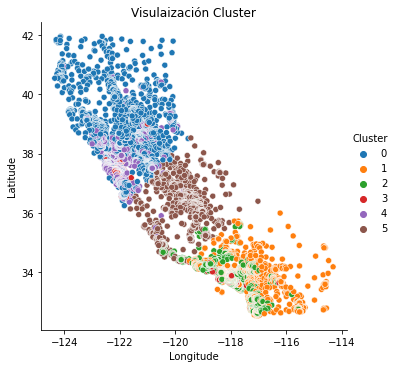

In [30]:
# visualización de cluster 
sns.relplot(x="Longitude", y="Latitude", hue="Cluster", data=df,)
plt.title('Visulaización Cluster', size='large');

***Extra ejercicio:***

In [38]:
escalador=StandardScaler()
df_norm=escalador.fit_transform(df)
df_norm

array([[ 2.34476576,  1.05254828, -1.32783522],
       [ 2.33223796,  1.04318455, -1.32284391],
       [ 1.7826994 ,  1.03850269, -1.33282653],
       ...,
       [-1.14259331,  1.77823747, -0.8237132 ],
       [-1.05458292,  1.77823747, -0.87362627],
       [-0.78012947,  1.75014627, -0.83369581]])

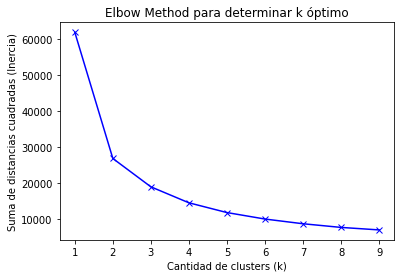

In [39]:
#cluster con mas cohesion -->metodo del codo y coef de silueta
#METODO DEL CODO
sum_distancias_cuadradas = []
#inercia calcula las distancias cuadradas

K = range(1,10)

for num_clusters in K :
    kmeans = KMeans(n_clusters=num_clusters)
    kmeans.fit(df_norm)
    sum_distancias_cuadradas.append(kmeans.inertia_)
plt.plot(K,sum_distancias_cuadradas,'bx-')
plt.xlabel('Cantidad de clusters (k)')
plt.ylabel('Suma de distancias cuadradas (Inercia)')
plt.title('Elbow Method para determinar k óptimo')
plt.show()

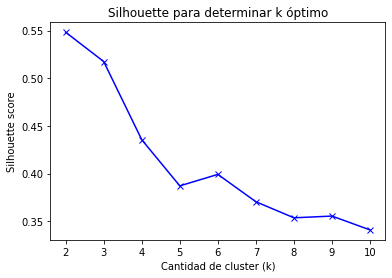

In [40]:
rango_n_clusters = [2, 3, 4, 5, 6, 7, 8,9,10]
silhouette_avg = []
for num_clusters in rango_n_clusters:
# fit Kmeans
    kmeans = KMeans(n_clusters=num_clusters)
    kmeans.fit(df_norm)
    cluster_labels = kmeans.labels_
# calcular silhouette
    silhouette_avg.append(silhouette_score(df_norm, cluster_labels))
plt.plot(rango_n_clusters,silhouette_avg,'bx-')
plt.xlabel('Cantidad de cluster (k)')
plt.ylabel('Silhouette score')
plt.title('Silhouette para determinar k óptimo')
plt.show()

#nos quedamos con k=2 porque es es el score de silueta dio mas alto.

In [41]:
kmeans = KMeans(n_clusters=2)
kmeans.fit(df_norm)

KMeans(n_clusters=2)

In [42]:
df2=escalador.inverse_transform(df_norm)

In [44]:
# transformo en un DataFrame 
df2=pd.DataFrame(df2,columns=['MedInc','Latitude','Longitude'])

In [45]:
df2['Cluster'] = kmeans.labels_
df2

,MedInc,Latitude,Longitude,Cluster
0,8.3252,37.88,-122.23,1
1,8.3014,37.86,-122.22,1
2,7.2574,37.85,-122.24,1
3,5.6431,37.85,-122.25,1
4,3.8462,37.85,-122.25,1
...,...,...,...,...
20635,1.5603,39.48,-121.09,1
20636,2.5568,39.49,-121.21,1
20637,1.7000,39.43,-121.22,1
20638,1.8672,39.43,-121.32,1


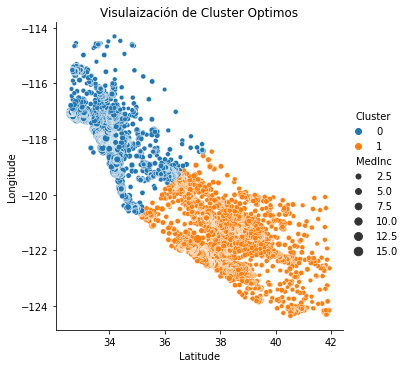

In [48]:
# visualización 
sns.relplot(x='Latitude', y='Longitude', data=df2, kind='scatter', size = 'MedInc',hue='Cluster')
plt.title('Visulaización de Cluster Optimos', size='large');

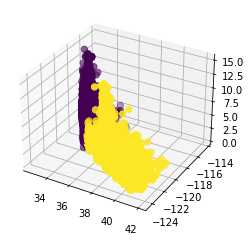

In [49]:
######## grafico 3D ##########

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
x = np.array(df2['Latitude'])
y = np.array(df2['Longitude'])
z = np.array(df2['MedInc'])

ax.scatter(x,y,z, c=df2["Cluster"], s=40)

plt.show()